# Grade: /100 pts

# Assignment 7: Tree-based methods

In this assignment you'll study tree methods. You will use a dataset that contains the premier league matches of soccer between 2010 and 2021. The data has the following variables:

|#|Attribute|Description|
|---|---|---|
|0|home_team|home team|
|1|away_team|away team|
|2|result_full|match result|
|3|home_clearances|home team clearances in the match|
|4|home_corners|home team corners in the match|
|5|home_fouls_conceded|home team fouls conceded in the match|
|6|home_offsides|home team offsides in the match|
|7|home_passes|home team passes in the match|
|8|home_possession|home team possession in the match|
|9|home_red_cards|home team red cards in the match|
|10|home_shots|home team shots in the match|
|11|home_shots_on_target|home team shots on target in the match|
|12|home_tackles|home team tackles in the match|
|13|home_touches|home team touches in the match|
|14|home_yellow_cards|home team yellow cards in the match|
|15|away_clearances|away tem clearances in the match|
|16|away_corners|away team corners in the match|
|17|away_fouls_concedevd|away team fouls conceded in the match|
|18|away_offsides|away team offsides in the match|
|19|away_passes|away team passes in the match|
|20|away_possession|away team possession in the match|
|21|away_red_cards|away team red cards in the match|
|22|away_shots|away team shots in the match|
|23|away_shots_on_target|away team shots on target in the match|
|24|away_tackles|away team tackles in the match|
|25|away_touches|away team touches in the match|
|26|away_yellow_cards|away team yellow cards in the match|
|27|clearances_avg_home|average home team clearances in the season; accumulated until the last match|
|28|corners_avg_home|average home team corners in the season; accumulated until the last match|
|29|fouls_conceded_avg_home|average home team fouls conceded in the season; accumulated until the last match|
|30|offsides_avg_home|average home team offsides in the season; accumulated until the last match|
|31|passes_avg_home|average home team passes in the season; accumulated until the last match|
|32|possession_avg_home|average home team possession in the season; accumulated until the last match|
|33|red_cards_avg_home|average home team red cards in the season; accumulated until the last match|
|34|shots_on_target_avg_home|average home team shots on target in the season; accumulated until the last match|
|35|tackles_avg_home|average home team tackles in the season; accumulated until the last match|
|36|touches_avg_home|average home team touches in the season; accumulated until the last match|
|37|yellow_cards_avg_home|average home team yellow cards in the season; accumulated until the last match|
|38|goals_scored_ft_avg_home|average home team goals scored in the season; accumulated until the last match|
|39|goals_conced_ft_avg_home|average home team goals conceded in the season; accumulated until the last match|
|40|sg_match_ft_acum_home|goals difference in the season; accumulated until the last match|
|41|goals_scored_ht_avg_home|average home team goals scored in 1st time in the season; accumulated until the last match|
|42|goals_conced_ht_avg_home|average home team goals conceded in 1st time in the season; accumulated until the last match|
|43|clearances_avg_away|average away team clearances in the season; accumulated until the last match|
|44|corners_avg_away|average away team corners in the season; accumulated until the last match|
|45|fouls_conceded_avg_away|average away team fouls conceded in the season; accumulated until the last match|
|46|offsides_avg_away|average away team offsides in the season; accumulated until the last match|
|47|passes_avg_away|average away team passes in the season; accumulated until the last match|
|48|possession_avg_away|average away team possession in the season; accumulated until the last match|
|49|red_cards_avg_away|average away team red cards in the season; accumulated until the last match|
|50|shots_on_target_avg_away|average away team shots on target in the season; accumulated until the last match|
|51|tackles_avg_away|average away team tackles in the season; accumulated until the last match|
|52|touches_avg_away|average away team touches in the season; accumulated until the last match|
|53|yellow_cards_avg_away|average away team yellow cards in the season; accumulated until the last match|
|54|goals_scored_ft_avg_away|average away team goals scored in the season; accumulated until the last match|
|55|goals_conced_ft_avg_away|average away team goals conceded in the season; accumulated until the last match|
|56|sg_match_ft_acum_away|goals difference in the season; accumulated until the last match|
|57|goals_scored_ht_avg_away|average away team goals scored in 1st time in the season; accumulated until the last match|
|58|goals_conced_ht_avg_away|average away team goals conceded in 1st time in the season; accumulated until the last match|

We aim to predict the outcome of matches. "0" if the home team won, "1" if the away team won, and "2" if the teams finished in a draw.

*Do not forget to label axes in your figures.*

*Take advantage of the flag `n_jobs=-1` where applicable.*

**Points will be deducted if a variable has a different name than the one specified by the question, where applicable.**

### <span style="color:yellow"> Global Toolbox </span>

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk
from sklearn.model_selection import  train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

import warnings; warnings.filterwarnings('ignore')
seed = 415
np.random.seed(seed)

### Q1.1 - <span style="color:red">[4]</span> - Load and clean the dataset:

1. Load the dataset.
2. Since we aim to predict the outcomes of matches, we cannot use the variables which were produced during the games such as passes, yellow/red cards etc. Please drop all the variables that you would not have known prior to the match, except for the goals.
3. Store the shape of the dataframe in a variable called <span style="color:pink">**shape_vector**</span> and `print` it.

In [48]:
df = pd.read_csv("PL_matches.csv")
df.drop(columns=list(df.iloc[:,3:27].columns), inplace=True)

shape_vector = df.shape
print(shape_vector)
df.head()

(3957, 35)


,home_team,away_team,result_full,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,...,red_cards_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away
0,Blackpool,West Bromwich Albion,2-1,38.4,4.6,11.3,3.4,407.9,48.3,0.1,...,0.1,4.1,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78
1,Liverpool,Manchester City,3-0,29.8,5.6,12.3,2.2,440.1,52.7,0.1,...,0.2,4.6,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32
2,Manchester United,Arsenal,1-0,29.1,6.1,10.8,2.9,517.3,57.6,0.0,...,0.2,6.3,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38
3,Stoke City,Aston Villa,2-1,32.3,4.0,13.7,2.0,256.0,35.7,0.0,...,0.0,3.3,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00
4,Fulham,Chelsea,0-0,38.7,5.0,12.1,2.9,446.8,51.6,0.0,...,0.0,6.3,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48


### Q1.2 - <span style="color:red">[10]</span> - Create the target variable:

1. Create a new variable (column) in the dataset called "target", which will be the target for our classification task. The entires of this variable will be "0" if the home team scored more goals than away team, "1" if the away scored more, and "2" if they scored the same number of goals. To create the target variable you **must** make use of the methods `pandas.Series.str.split` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html)) and `pandas.DataFrame.apply` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)).
2. Which matches had the greatest goal difference? `print` the name of the home team, the name of the away team, and the goal difference of the match. Example output: "The match between TeamA and TeamB with a goal difference of X".
3. Drop all variables related to the results of the games including the names of the teams, except for your target (i.e., extracted in Step 1).
4. **Written question:** Is this dataset balanced? Why? Write no more than 2 lines.

In [49]:
df[["Home_g","Away_g"]] = df["result_full"].str.split("-",expand=True).astype(int)
df["target"] = df.apply(lambda x: 0 if (x["Home_g"]>x["Away_g"]) else (1 if (x["Away_g"]>x["Home_g"]) else 2),axis=1)

df["Goal_difference"] = np.abs(df["Home_g"]-df["Away_g"])

for i in df.loc[df["Goal_difference"]==df.Goal_difference.max()].index.values:
    home_team   = df.home_team.values[i]
    away_team   = df.away_team.values[i]
    game_result = df.Goal_difference.values[i]
    print(f"Games with greatest goal difference: The match between {home_team} and {away_team} with a goal difference of {game_result}.")

df.drop(columns = ["home_team","away_team","Home_g","Away_g","result_full","Goal_difference"],inplace=True)

df.head()

Games with greatest goal difference: The match between Southampton and Leicester City with a goal difference of 9.
Games with greatest goal difference: The match between Manchester United and Southampton with a goal difference of 9.


,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,possession_avg_home,red_cards_avg_home,shots_on_target_avg_home,tackles_avg_home,touches_avg_home,...,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_scored_ft_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,goals_scored_ht_avg_away,goals_conced_ht_avg_away,target
0,38.4,4.6,11.3,3.4,407.9,48.3,0.1,4.4,18.8,619.1,...,4.1,20.0,584.9,1.6,1.44,1.67,-2.0,0.33,0.78,0
1,29.8,5.6,12.3,2.2,440.1,52.7,0.1,5.3,24.0,659.5,...,4.6,22.0,681.4,2.0,1.61,0.87,23.0,0.87,0.32,0
2,29.1,6.1,10.8,2.9,517.3,57.6,0.0,5.6,17.3,726.1,...,6.3,21.2,748.0,1.8,2.12,1.12,16.0,0.94,0.38,0
3,32.3,4.0,13.7,2.0,256.0,35.7,0.0,4.0,18.3,442.0,...,3.3,25.0,567.3,2.0,1.33,2.00,-2.0,1.00,1.00,0
4,38.7,5.0,12.1,2.9,446.8,51.6,0.0,4.5,21.3,669.1,...,6.3,19.4,728.6,1.4,1.84,0.88,24.0,0.84,0.48,2


In [50]:
(df["target"].value_counts(normalize=True)*100).round(2)

0    45.36
1    30.05
2    24.59
Name: target, dtype: float64

**Written answer:** This dataset is not balanced, because we have three classes with uneven shares in the dataset. For example, the category Home includes more than 45% of the data and Draw about 25%.

### Q1.3 - <span style="color:red">[4]</span> - Correlation:

- Compute pairwise Pearson correlation coefficient (PCC) of the attributes and report only those with pairwise correlation absolute value greater than 0.7. The table below illustrates how the output of your code should look like. It is just for illustration and its number of rows is not real. (We are checking pairwise correlations amongst the variables - and not each variable with respect to target.)

|Row Index #|Variable Group 1|Variable Group 2|PCC|
|---|---|---|---|
|137|passes_avg_home|possession_avg_home|0.935083|
|...|...|...|...|
|...|...|...|...|

Caveat 1: The table must be sorted by PCC in descending order.

Caveat 2: Your table must not include duplicated correlation reports.

Caveat 3: Your table must not include any correlation reports involving the target.

- **Written question:** Using common sense and your understanding of the attributes, can you tell why are these variables correlated? Write no more than 5 sentences.

- Usually, we don’t want to include in the model highly correlated features (i.e., with pairwise Pearson correlation coefficient, for example, greater than 0.7 or below -0.7) because they give almost the same information (i.e., redundancy). The table you created is already listing those features for you. Drop those showing up under "Variable Group 2" from your dataframe (as keeping those under "Variable Group 1" should suffice).

In [51]:
correlations = df.drop("target", axis=1).corr().unstack().reset_index().rename(columns={"level_0": "Variable Group 1", "level_1":"Variable Group 2", 0:"PCC"})
correlations = correlations[(np.abs(correlations["PCC"])>0.7)&(correlations["PCC"]!=1)].sort_values("PCC", ascending=False)
correlations = correlations.iloc[::2]
correlations

,Variable Group 1,Variable Group 2,PCC
137,passes_avg_home,touches_avg_home,0.990809
820,touches_avg_away,passes_avg_away,0.990702
169,possession_avg_home,touches_avg_home,0.950461
821,touches_avg_away,possession_avg_away,0.949458
133,passes_avg_home,possession_avg_home,0.935083
692,possession_avg_away,passes_avg_away,0.934452
894,goals_scored_ft_avg_away,goals_scored_ht_avg_away,0.802953
459,goals_scored_ht_avg_home,goals_scored_ft_avg_home,0.797851
763,shots_on_target_avg_away,goals_scored_ft_avg_away,0.782077
359,goals_scored_ft_avg_home,shots_on_target_avg_home,0.774993


**Written answer:**

The most correlated variables are the ones related to passes, touches, and possession. This happens because in order to have possession, the players have to pass the ball, and to pass the ball they have to touch it. So, these events are highly dependent. In fact, one event could not happen if the other had not happened (causality).

In [52]:
# drop redundant attributes:
print(df.shape)
df.drop(correlations["Variable Group 2"].unique(), axis=1, inplace=True)
display(df)

(3957, 33)


,clearances_avg_home,corners_avg_home,fouls_conceded_avg_home,offsides_avg_home,passes_avg_home,red_cards_avg_home,tackles_avg_home,yellow_cards_avg_home,sg_match_ft_acum_home,goals_scored_ht_avg_home,...,fouls_conceded_avg_away,offsides_avg_away,red_cards_avg_away,shots_on_target_avg_away,tackles_avg_away,touches_avg_away,yellow_cards_avg_away,goals_conced_ft_avg_away,sg_match_ft_acum_away,target
0,38.4,4.6,11.3,3.4,407.9,0.1,18.8,1.2,-7.0,0.67,...,10.8,2.7,0.1,4.1,20.0,584.9,1.6,1.67,-2.0,0
1,29.8,5.6,12.3,2.2,440.1,0.1,24.0,1.6,4.0,0.55,...,13.3,3.0,0.2,4.6,22.0,681.4,2.0,0.87,23.0,0
2,29.1,6.1,10.8,2.9,517.3,0.0,17.3,1.6,19.0,1.07,...,12.9,2.5,0.2,6.3,21.2,748.0,1.8,1.12,16.0,0
3,32.3,4.0,13.7,2.0,256.0,0.0,18.3,2.3,-4.0,0.33,...,16.3,2.3,0.0,3.3,25.0,567.3,2.0,2.00,-2.0,0
4,38.7,5.0,12.1,2.9,446.8,0.0,21.3,1.1,0.0,0.46,...,11.4,3.1,0.0,6.3,19.4,728.6,1.4,0.88,24.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,13.0,6.6,10.2,1.7,664.1,0.0,12.7,1.0,19.0,0.90,...,11.9,1.4,0.1,3.5,16.8,651.0,1.5,1.38,-6.0,1
3953,20.2,4.0,11.2,2.3,362.7,0.0,13.5,1.3,-16.0,0.27,...,10.3,1.9,0.0,4.5,17.7,679.0,1.8,1.15,15.0,2
3954,19.2,3.8,10.4,1.6,382.1,0.1,16.5,1.2,-14.0,0.64,...,12.2,2.3,0.0,5.9,14.9,742.6,1.6,1.23,21.0,2
3955,20.4,4.7,12.3,2.1,386.1,0.1,16.5,1.8,-28.0,0.19,...,11.2,1.9,0.1,5.3,13.3,587.0,1.7,1.08,12.0,0


### Q2.1 - <span style="color:red">[35]</span> - Random Forest
- Separate the data into X and y, X should have the predictors and y the target

- Create train and test set with 30% of the data in the test set. Use the provided random seed.

- Instantiate three [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.get_params) each with a different method of selection for argument ```max_features```, *i.e.*, "sqrt", "log2", "None". Train them in a `for` loop with the number of trees in the range of 3 to 263 inclusive with step size of 20. Then, plot their OOB scores against number of trees in the forest for each classifier. Which selection method yields a better generalization score?

- Obtain the accuracy and the confusion matrix of the model with the best OOB rate. Store the accuracy in a variable called **accuracy1**.

- Use the provided `export_graphviz` (or any other tool) to visualize one arbitrary tree from one of the forests.

- **Written question:** Is this a good model? Write no more than 5 sentences.

**Use `random_state=seed` in all methods/functions accepting this argument.**

In [53]:
X = df.drop(columns = "target")
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = seed)

In [72]:
min_estimators = 3
max_estimators = 263
stepsize = 20

len(np.linspace(3, 263, 20))

20

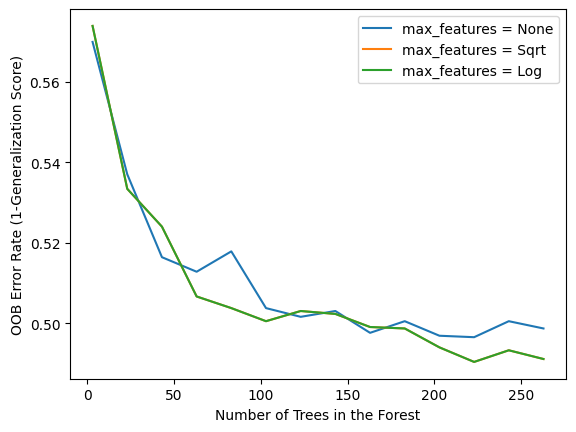

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Range of `n_estimators` values to explore.
ran_sqrt = RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=seed,
            n_jobs=-1)

ran_log = RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=seed,
            n_jobs=-1)

ran = RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=seed,
            n_jobs=-1)

r = range(min_estimators, max_estimators+1, stepsize)

nTrees = []
oob_error_sqrt = np.zeros(len(list(r)))
oob_error_log  = np.zeros(len(list(r)))
oob_error      = np.zeros(len(list(r)))

j=-1
for i in r:
    ran_sqrt.set_params(n_estimators=i)
    ran_sqrt.fit(X_train, y_train)

    ran_log.set_params(n_estimators=i)
    ran_log.fit(X_train, y_train)

    ran.set_params(n_estimators=i)
    ran.fit(X_train, y_train)

    # Record the OOB score (higher better) for each `n_estimators=i`
    nTrees.append(i)
    j+=1
    oob_error_sqrt[j]=ran_sqrt.oob_score_
    oob_error_log[j]=ran_log.oob_score_
    oob_error[j]=ran.oob_score_

plt.plot(nTrees,1-oob_error,label = "max_features = None") # (1-oob: lower better )
plt.plot(nTrees,1-oob_error_sqrt,label = "max_features = Sqrt")
plt.plot(nTrees,1-oob_error_log,label = "max_features = Log")
plt.xlabel('Number of Trees in the Forest')
plt.ylabel('OOB Error Rate (1-Generalization Score)')
plt.legend()
plt.show()

# The resulting plot shows that generalization error of "max_features=Sqrt and Log" stabilizes to smaller values compared to "None".

# FYI:
# In the documentation, for example, you can read that "max_features=None" means "max_features=n_features".
# In other words, at a split, the tree sees a subset of all available features.

In [58]:
clf = RandomForestClassifier(
            n_estimators=max_estimators,
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=seed,
            n_jobs=-1).fit(X_train, y_train)

[[0.35 0.08 0.02]
 [0.14 0.16 0.02]
 [0.15 0.07 0.02]]


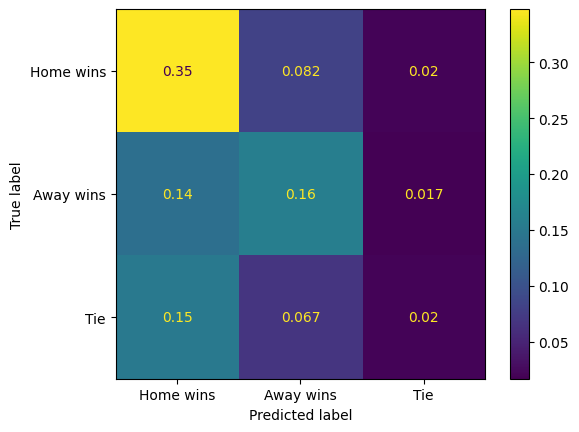

In [59]:
cm = confusion_matrix(y_true=y_test, y_pred=clf.predict(X_test))/len(y_test)  # "/len(y_test)" is to get them in percentage
print(cm.round(2))
# or
ConfusionMatrixDisplay(cm, display_labels = ['Home wins', 'Away wins', 'Tie']).plot()
plt.show()

In [60]:
accuracy1 = accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)) # i.e., some of the diagonal entries of the confusion matrix
accuracy1.round(2)

0.53

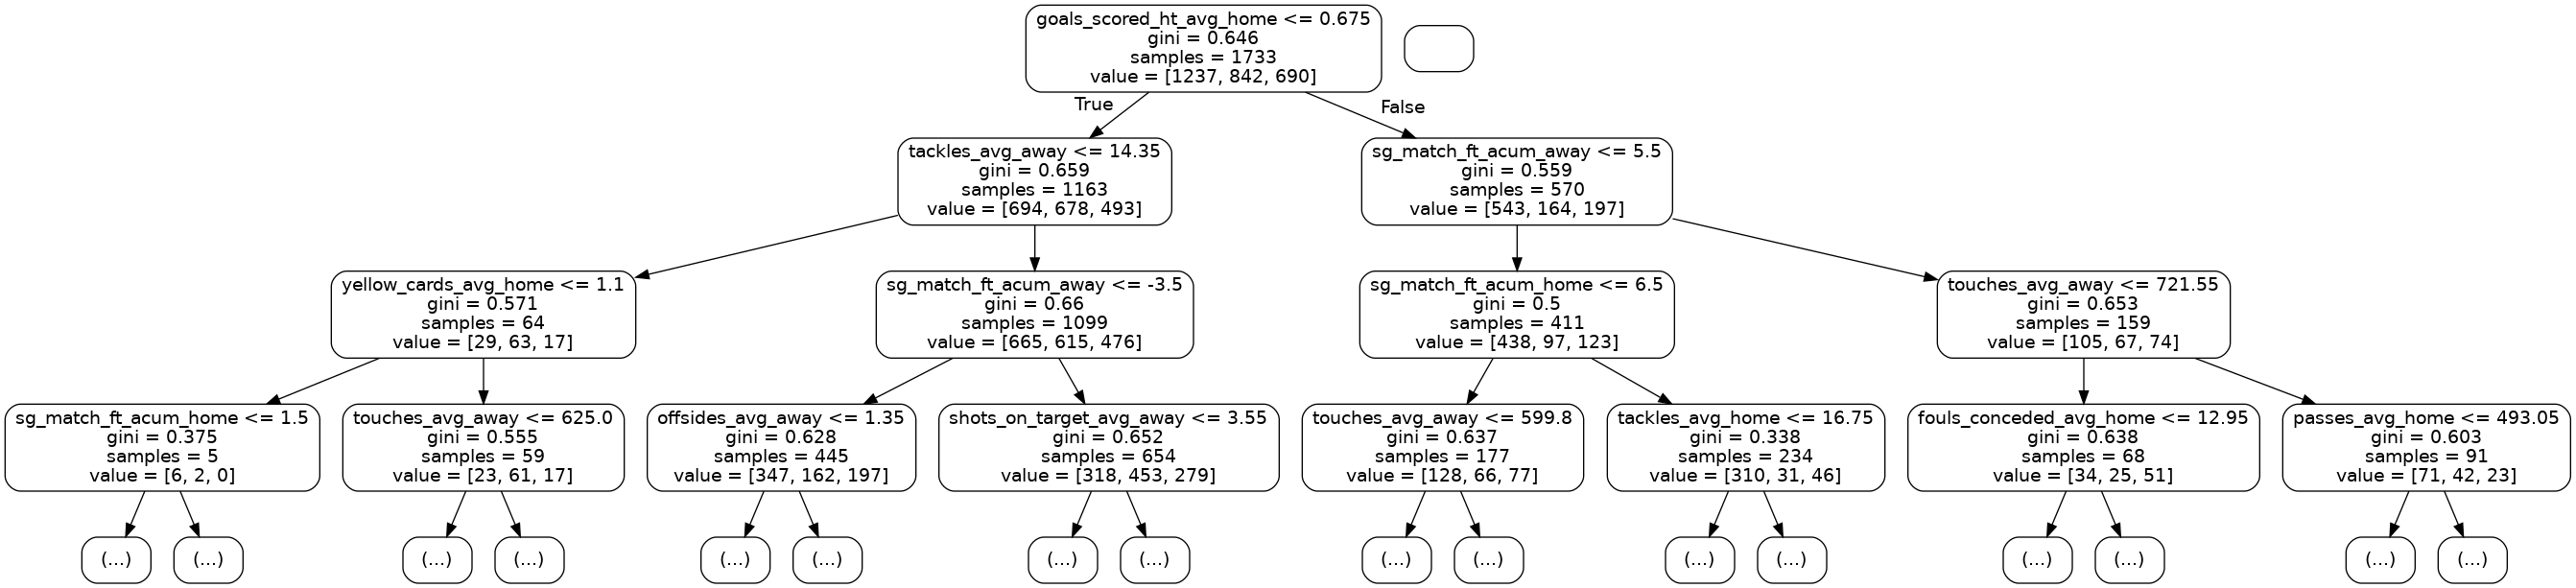

In [61]:
dot_data = export_graphviz(clf.estimators_[5], out_file=None, rounded = True, max_depth=3, feature_names=X_train.columns)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
# Show graph
Image(graph.create_png())

# or
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20, 10))
# plot_tree(clf.estimators_[5], filled=True, feature_names=X_train.columns, rounded=True)
# plt.show()

**Written answer:** This is not a good model. It does relatively good for predicting when the home team wins, but its accuracy over the other two classes is too low.

### Q2.2 - <span style="color:red">[15]</span> - Create a barplot reporting feature importance for the best model (found in Q2.1). For this purpose, instead of using mean decrease in impurity as the metric to calculate the importance scores, we want to use the permutation importance algorithm (check out the [documentation](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance)). Because, impurity-based feature importances can be misleading for high cardinality features (many unique values), but permutation feature importances do not have a bias toward high-cardinality features and can be computed on a left-out test set. The x-axis of your barplot should reflect the features' names and the y-axis their mean accuracy decrease. Each bar must also show its error bar. According to this barpot, what are the 3 most important features?

Use [`sklearn.inspection.permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) with `n_repeats=10` (because the computation for full permutation importance is very costly, so let's limit it).

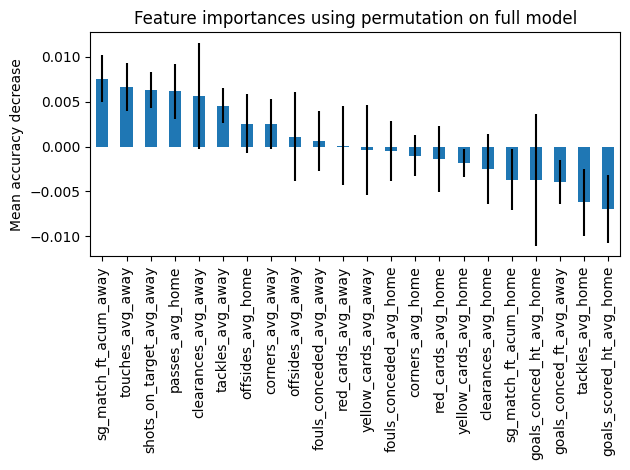

In [62]:
from sklearn.inspection import permutation_importance
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=seed, n_jobs=-1)

forest_importances = pd.Series(result.importances_mean, index=X_train.columns)
fig, ax = plt.subplots()
forest_importances.sort_values(ascending=False).plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

**Written answer:**

The 3 most important features are the attributes corresponding to the 3 highest bars in the figure.

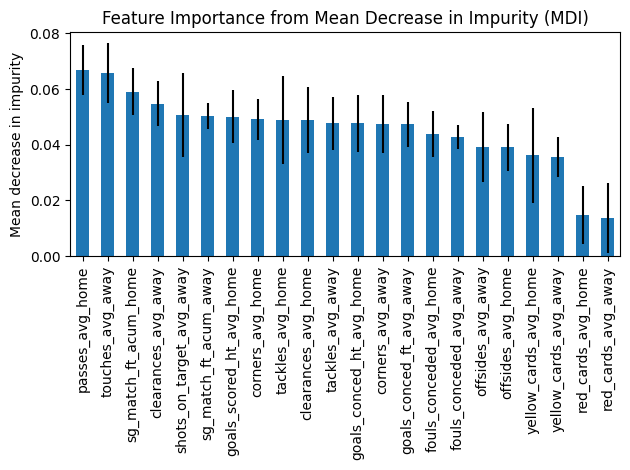

In [63]:
# FYI
# Feature Importance from Mean Decrease in Impurity (MDI)
forest_importances = pd.Series(clf.feature_importances_, index=X_train.columns)

fig, ax = plt.subplots()
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances.sort_values(ascending=False).plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importance from Mean Decrease in Impurity (MDI)")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

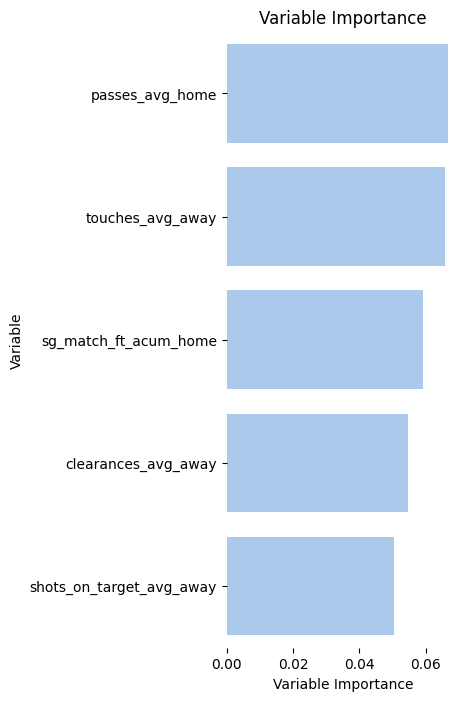

In [64]:
# FYI
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1][:5]

f, ax = plt.subplots(figsize=(3, 8))
plt.title("Variable Importance")
sns.set_color_codes("pastel")
sns.barplot(y=[X_train.columns[i] for i in indices],
            x=importances[indices],
            label="Total", color="b")
ax.set(ylabel="Variable",
       xlabel="Variable Importance")
sns.despine(left=True, bottom=True)

### Q3.1 - <span style="color:red">[20]</span> - XGBoosting
Now, we'll repeat the process for the XGB model, using an [```XGBClassifier``` object](https://xgboost.readthedocs.io/en/latest/python/python_api.html).

1. Use cross-validated grid search (with 5 stratified validation sets) to find the best values from the lists below for `XGBClassifier`. Use only 40% of the training set for your search, otherwise it will take a long time. Take advantage of `n_jobs=-1`. Report the optimal values found per argument.
 - Number of trees: [100, 150, 200]
 - Maximum depth: [8, 25, 42]
 - Learning rate: [0.1, 0.5, 0.9]

2. Train a `XGBClassifier` using the optimal values and report its accuracy as well as the confusion matrix. Store the accuracy in a variable called **accuracy2**.
3. Compare the confusion matrix and the accuracy of this model with the previous one. Is the performance of XGBoost better than the RandomForestClassifier?

**Use `random_state=seed` in all methods accepting this argument.**

In [65]:
import xgboost
from xgboost import XGBClassifier

param_grid = dict({'n_estimators'  : [100, 150, 200],
                   'max_depth'     : [8, 25, 42],
                   'learning_rate' : [0.1, 0.5, 0.9]
                  })

val_train = X_train.copy()
val_train['y'] = y_train.copy()
val_train = val_train.sample(frac = 0.4,          # The fraction to extract
                             random_state=seed    # The seed.
                             )

GridXGB = GridSearchCV(XGBClassifier(random_state=seed, tree_method='auto'),
                       param_grid,
                       cv = StratifiedKFold(n_splits=5) ,
                       n_jobs = -1,
                       refit = False
                      )
# for the argument "tree_method" please study this:
# https://xgboost.readthedocs.io/en/stable/treemethod.html

GridXGB.fit(val_train.iloc[:, :-1], val_train['y'])

print(GridXGB.best_params_)

{'learning_rate': 0.9, 'max_depth': 25, 'n_estimators': 150}


In [66]:
# Define the XGB model # 3pts
final_XGB = XGBClassifier(max_depth=GridXGB.best_params_.get('max_depth'),                 # Depth of each tree
                          learning_rate=GridXGB.best_params_.get('learning_rate'),          # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                          n_estimators=GridXGB.best_params_.get('n_estimators'),            # How many trees to use, the more the better, but decrease learning rate if many used.
                          tree_method='auto',
                          n_jobs=-1).fit(X_train, y_train)

final_XGB

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

[[0.3  0.09 0.07]
 [0.12 0.14 0.05]
 [0.12 0.07 0.04]]


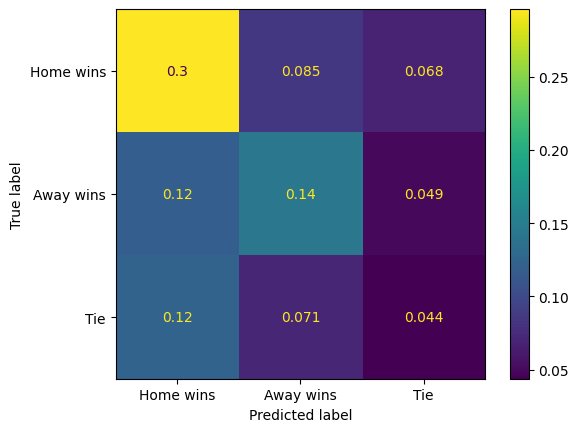

In [67]:
cm2 = confusion_matrix(y_true = y_test, y_pred = final_XGB.predict(X_test))/len(y_test)
print(cm2.round(2))
# or
ConfusionMatrixDisplay(cm2, display_labels = ['Home wins', 'Away wins', 'Tie']).plot()
plt.show()

In [68]:
accuracy2 = accuracy_score(y_true = y_test, y_pred = final_XGB.predict(X_test))
accuracy2.round(2)

0.48

In [69]:
print(f"Accuracy Random Forest is {accuracy1.round(2)}. Accuracy XGB is {accuracy2.round(2)}.")

Accuracy Random Forest is 0.53. Accuracy XGB is 0.48.


**Written answer:**

Accuracy of the Random Forest model is greater than that of the XGboost.

### Q3.2 - <span style="color:red">[4]</span> - **Written question:** How could you potentially improve the accuracy of the models? Write no more than 5 sentences (no code).

**Written answer:** To improve the accuracy of the model we would have to improve the feature selection/extraction as we didn't really do a careful evaluation of the variables to begin with. We could also do a more refined grid search over both models taking into account more hyperparameters to check more possibilities.

### Q3.3 - <span style="color:red">[8]</span> - Create a barplot reporting permutation feature importances for your final XGB model. What are the top 3 most important features?

Use [`sklearn.inspection.permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) with `n_repeats=10` (because the computation for full permutation importance is very costly, so let's limit it).

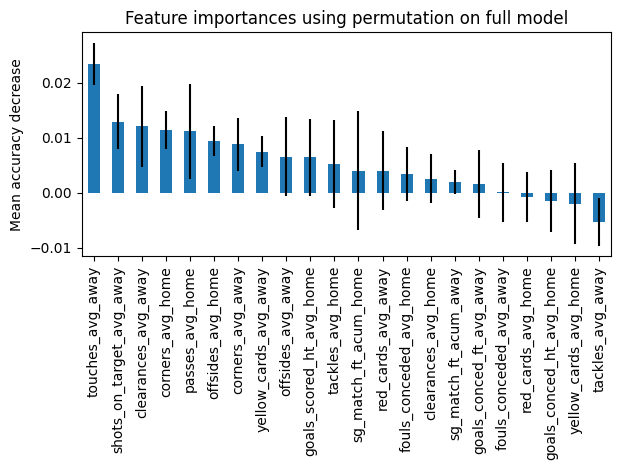

In [70]:
result_xgb = permutation_importance(final_XGB, X_test, y_test, n_repeats=10, random_state=seed, n_jobs=-1)

forest_importances_xgb = pd.Series(result_xgb.importances_mean, index=X_train.columns)
fig, ax = plt.subplots()
forest_importances_xgb.sort_values(ascending=False).plot.bar(yerr=result_xgb.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

**Written answer:**

The 3 most important features are the attributes corresponding to the 3 highest bars in the figure.

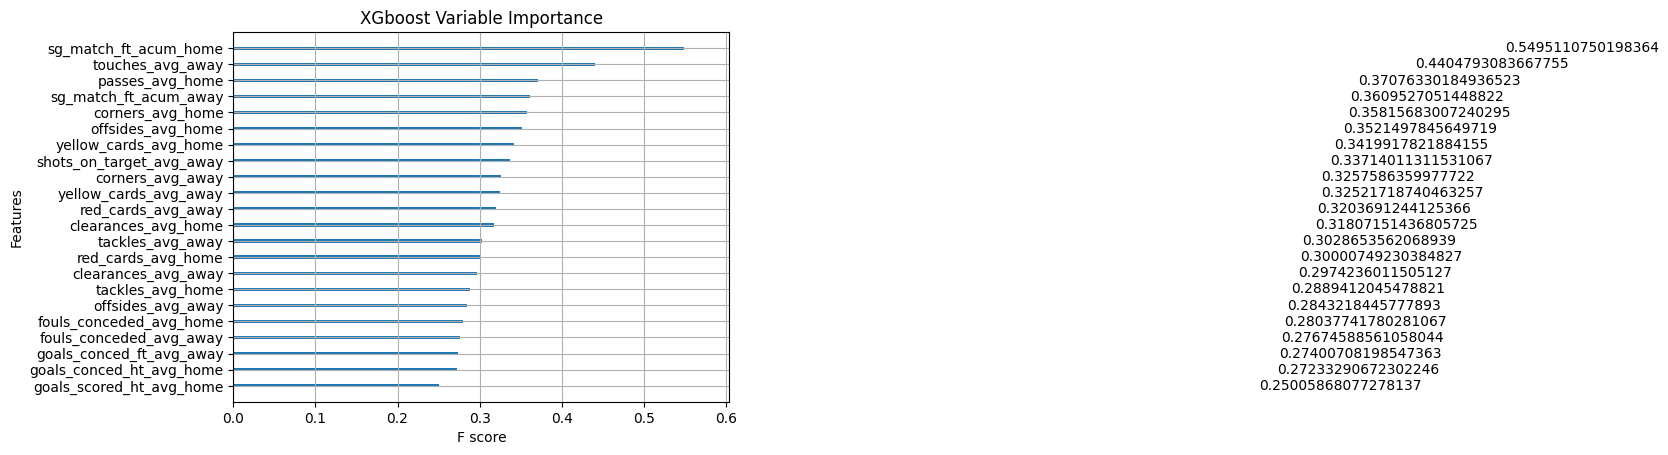

In [71]:
# FYI
# Using built-in functionalities of the xgboost package for plotting importances.
# Options for importance_types are: ‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’
# Read here about them:
# https://towardsdatascience.com/be-careful-when-interpreting-your-features-importance-in-xgboost-6e16132588e7

xgboost.plot_importance(final_XGB, importance_type="gain")
plt.title('XGboost Variable Importance')
plt.show()

$$The\;End$$